<a href="https://colab.research.google.com/github/Vedangini-Kenma/AQI_HEATWAVE_PREDICTION/blob/NASSCOM/AQI-HEATWAVE_FULL_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sb
import matplotlib.pyplot as plt
import glob
!pip install ydata-profiling
from ydata_profiling import ProfileReport


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 27.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 33.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=cf6dfc0a7c01404e87a0debc1415c9b436184a11f037f0e37aacb13b30e79624
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Un

# PRE-PROCESSING FOR TRANSPORT DATA 
AS WE REQUIRE ONLY NO. OF DIESEL CARS FROM IT

In [ ]:
path2 = '/content/transport'
all_files1 = glob.glob(path2 + "/*.csv")

In [ ]:
all_dfs1 = []
for one_filenames in all_files1:
    print(f'Loading {one_filenames}')
    new_df = pd.read_csv(one_filenames,encoding = 'unicode_escape',index_col=None, header =0)
    all_dfs1.append(new_df)

In [ ]:
len(all_dfs1)

In [ ]:
df_1 = pd.concat(all_dfs1)

In [ ]:
df_1['todate'] = pd.to_datetime(df_1['todate'])

In [ ]:
# Get data pofiling
profile2 =ProfileReport(df_1, title='Panda Profiling Report2', explorative=True)
profile2.to_file("output2.html")

In [ ]:
import array as arr

unique_count = df_1['todate'].nunique()

In [ ]:
# Get minimum and maximum dates

min_date_time = df_1['todate'].min()
max_date_time = df_1['todate'].max()

array = [0] * ((max_date_time - min_date_time).days + 1)
'''
  [
    [19, 121], // 1st March
    ..
    ..
    [31, 212] // i 

    [21 ,12], // 31st March
  ]
'''

print(type(min_date_time), (max_date_time - min_date_time).days)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 1426


In [ ]:
for index, row in df_1.iterrows():
  idx = (row['todate'] - min_date_time).days

  if 'DIESEL' in str(row['fuel']):
    array[idx] += 1 # diesel cars count
  
print(array)

[503, 261, 246, 257, 835, 1118, 1083, 561, 576, 1049, 1084, 1114, 1266, 764, 28, 476, 989, 1354, 1860, 1104, 843, 1233, 543, 473, 455, 783, 755, 53, 733, 1127, 348, 1095, 1203, 1377, 1347, 635, 604, 1099, 1136, 1289, 1379, 1287, 590, 591, 1193, 1309, 1808, 1442, 388, 576, 754, 832, 329, 676, 903, 330, 1084, 451, 792, 1303, 1287, 1178, 1378, 788, 760, 1232, 1185, 790, 888, 1299, 540, 754, 1345, 1418, 1481, 1438, 2068, 2027, 1344, 359, 381, 868, 672, 730, 882, 434, 702, 1770, 388, 840, 811, 364, 515, 940, 929, 1018, 939, 811, 408, 476, 948, 1002, 1085, 1163, 1013, 430, 797, 1689, 951, 733, 529, 903, 299, 644, 960, 545, 847, 1740, 877, 821, 150, 679, 1051, 1123, 1276, 1151, 520, 507, 875, 881, 1089, 1180, 974, 429, 421, 899, 1254, 1565, 1809, 334, 1068, 573, 714, 444, 721, 838, 906, 760, 1164, 1076, 1164, 1379, 1291, 1222, 613, 570, 1060, 1130, 1240, 1313, 1194, 510, 611, 1189, 1334, 1774, 1965, 1926, 1336, 608, 1337, 868, 249, 960, 997, 399, 860, 715, 1749, 1155, 1096, 1032, 394, 386, 77

In [ ]:
data = pd.DataFrame(newCol)


In [ ]:
data.columns =['Date', 'No. of Diesel cars']

In [ ]:
data.head()

,Date,No. of Diesel cars
0,2019-01-13,503
1,2019-01-14,261
2,2019-01-15,246
3,2019-01-16,257
4,2019-01-17,835


In [ ]:
# we are exporting to check the outcomes manually
data.to_csv('transport.csv', encoding='utf-8')

# HEATWAVE OCCURRENCE

Uploading the Required DataFrames

In [ ]:
path = '/content/temp34.csv'
df0 = pd.read_csv(path,encoding = 'unicode_escape',index_col=None, header =0)
df0['Date'] = pd.to_datetime(df0['Date'])

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df0['District'].unique

<bound method Series.unique of 0               Adilabad
1               Adilabad
2               Adilabad
3               Adilabad
4               Adilabad
               ...      
136801    Warangal Urban
136802    Warangal Urban
136803    Warangal Urban
136804    Warangal Urban
136805    Warangal Urban
Name: District, Length: 136806, dtype: object>

In [ ]:
path = '/content/transport.csv'
df2 = pd.read_csv(path,encoding = 'unicode_escape',index_col=None, header =0)
df2['Date'] = pd.to_datetime(df2['Date'])

Since we are asked to take out information district wise, we are  focusing on 1 District at a time. The following steps can be repeated for all the districts

In [ ]:
df1 = df0[(df0.District == 'Adilabad')]

In [ ]:
df1.head()

,District,Mandal,Date,Rainfall (mm),temp_min (â°C),temp_max (â°C),humidity_min (%),Humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,Adilabad,Adilabad (Urban),2019-04-01,0.0,25.3,42.5,12.2,42.8,0.0,2.8
1,Adilabad,Adilabad (Urban),2019-04-02,0.0,23.9,42.2,14.7,19.5,0.3,2.6
2,Adilabad,Adilabad (Urban),2019-04-03,0.0,27.0,41.5,16,50.5,0.2,1.8
3,Adilabad,Adilabad (Urban),2019-04-04,0.0,28.0,41.4,15.8,59.2,0.3,3.0
4,Adilabad,Adilabad (Urban),2019-04-05,0.0,25.9,40.6,20.4,49.5,0.0,2.9


**Pre-Processing Of Data**

In [ ]:
df3= pd.merge(df1,df2,on='Date')

In [ ]:
df3.columns

Index(['District', 'Mandal', 'Date', 'Rainfall (mm)', 'temp_min (â°C)',
       'temp_max (â°C)', 'humidity_min (%)', 'Humidity_max (%)',
       'wind_speed_min (Kmph)', 'wind_speed_max (Kmph)', 'Unnamed: 0',
       'No. of Diesel cars'],
      dtype='object')

In [ ]:
del df3['Unnamed: 0']

In [ ]:
df3['Date'] = pd.to_datetime(df3['Date'])

In [ ]:
#Since we don't require information of mandals, we group the entire data according to the dates.
df3=df3.groupby(['Date']).mean()

In [ ]:
df3.columns


Index(['Rainfall (mm)', 'temp_min (â°C)', 'temp_max (â°C)',
       'Humidity_max (%)', 'wind_speed_min (Kmph)', 'wind_speed_max (Kmph)',
       'No. of Diesel cars', 'heatwave', 'delta_temp'],
      dtype='object')

In [ ]:
newdf=df3[['Rainfall (mm)', 'temp_min (â°C)',
       'temp_max (â°C)', 'Humidity_max (%)',
       'wind_speed_min (Kmph)', 'wind_speed_max (Kmph)',
       'No. of Diesel cars']]

/usr/local/lib/python3.8/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


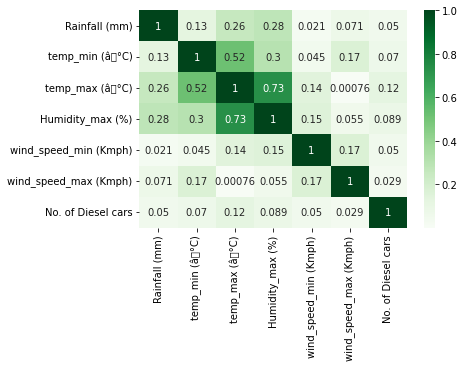

In [ ]:

dataplot = sb.heatmap(abs(newdf.corr()), cmap="Greens", annot=True)


MODEL BUILDING USING **LSTM**

In [ ]:
# Calculate the temperature difference
delta_temp = df3['temp_max (â°C)']

# Set the value of heatwave based on delta_temp
df3['heatwave'] = (delta_temp>=40).astype(int)

# Replace the NaN value in the first row of heatwave with 0
df3.loc[df3.index[8], 'heatwave'] = 0
#exporting  new data to manually confirm the heatwave occurence
df3.to_csv('data_with_heatwave.csv', index=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Add a new column for change in temperature
df3['delta_temp'] = df3['temp_max (â°C)'].diff()


# Split the dataframe into features and target variable
X = df3.drop(['heatwave'], axis=1)
X['delta_temp'] = X['delta_temp'].shift(-1)  # Shift delta_temp one row up
X = X.dropna().values
y = df3['heatwave'].iloc[1:].values  # Drop the first row of y

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size, :], X[train_size:, :]
y_train, y_test2 = y[:train_size], y[train_size:]


# Reshape the data into 3D for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
# Assuming X_train and y_train have different lengths
X_train = X_train[:len(y_train)]
y_train = y_train[:len(X_train)]

# Assuming X_test and y_test have different lengths
X_test = X_test[:len(y_test2)]
y_test2 = y_test2[:len(X_test)]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh', return_sequences=True))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test2), verbose=1)


# Make predictions on the test data
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

# Calculate the accuracy of the predictions
acc = accuracy_score(y_test2, classes_x)
print(f'Test accuracy: {acc:.3f}')

rmse = np.sqrt(mean_squared_error(y_test2, classes_x))
print('RMSE:', rmse)

Epoch 1/100
22/22 [==============================] - 9s 62ms/step - loss: 0.6654 - accuracy: 0.8248 - val_loss: 0.6096 - val_accuracy: 0.9702
Epoch 2/100
22/22 [==============================] - 0s 8ms/step - loss: 0.5702 - accuracy: 0.8846 - val_loss: 0.4383 - val_accuracy: 0.9702
Epoch 3/100
22/22 [==============================] - 0s 8ms/step - loss: 0.4278 - accuracy: 0.8846 - val_loss: 0.2287 - val_accuracy: 0.9702
Epoch 4/100
22/22 [==============================] - 0s 11ms/step - loss: 0.3718 - accuracy: 0.8846 - val_loss: 0.1973 - val_accuracy: 0.9702
Epoch 5/100
22/22 [==============================] - 0s 8ms/step - loss: 0.3669 - accuracy: 0.8846 - val_loss: 0.2016 - val_accuracy: 0.9702
Epoch 6/100
22/22 [==============================] - 0s 10ms/step - loss: 0.3633 - accuracy: 0.8846 - val_loss: 0.1998 - val_accuracy: 0.9702
Epoch 7/100
22/22 [==============================] - 0s 14ms/step - loss: 0.3600 - accuracy: 0.8846 - val_loss: 0.2009 - val_accuracy: 0.9702
Epoch 8/1

Checking the model with min temp too

In [ ]:
# Calculate the temperature difference
delta_temp = df3['temp_min (â°C)'].diff()

# Set the value of heatwave based on delta_temp
df3['heatwave'] = (delta_temp >= 4).astype(int)

# Replace the NaN value in the first row of heatwave with 0
df3.loc[df3.index[8], 'heatwave'] = 0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Add a new column for change in temperature
df3['delta_temp'] = df3['temp_min (â°C)'].diff()


# Split the dataframe into features and target variable
X = df3.drop(['heatwave'], axis=1)
X['delta_temp'] = X['delta_temp'].shift(-1)  # Shift delta_temp one row up
X = X.dropna().values
y = df3['heatwave'].iloc[1:].values  # Drop the first row of y

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size, :], X[train_size:, :]
y_train, y_test2 = y[:train_size], y[train_size:]


# Reshape the data into 3D for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
# Assuming X_train and y_train have different lengths
X_train = X_train[:len(y_train)]
y_train = y_train[:len(X_train)]

# Assuming X_test and y_test have different lengths
X_test = X_test[:len(y_test2)]
y_test2 = y_test2[:len(X_test)]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh', return_sequences=True))
model.add(LSTM(units=50, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test2), verbose=1)


# Make predictions on the test data
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

# Calculate the accuracy of the predictions
acc = accuracy_score(y_test2, classes_x)
print(f'Test accuracy: {acc:.3f}')

rmse = np.sqrt(mean_squared_error(y_test2, classes_x))
print('RMSE:', rmse)

Epoch 1/100
22/22 [==============================] - 6s 56ms/step - loss: 0.6505 - accuracy: 0.9772 - val_loss: 0.5949 - val_accuracy: 0.9967
Epoch 2/100
22/22 [==============================] - 0s 9ms/step - loss: 0.5128 - accuracy: 0.9801 - val_loss: 0.3886 - val_accuracy: 0.9967
Epoch 3/100
22/22 [==============================] - 0s 7ms/step - loss: 0.2697 - accuracy: 0.9801 - val_loss: 0.1307 - val_accuracy: 0.9967
Epoch 4/100
22/22 [==============================] - 0s 8ms/step - loss: 0.1233 - accuracy: 0.9801 - val_loss: 0.0460 - val_accuracy: 0.9967
Epoch 5/100
22/22 [==============================] - 0s 10ms/step - loss: 0.1006 - accuracy: 0.9801 - val_loss: 0.0397 - val_accuracy: 0.9967
Epoch 6/100
22/22 [==============================] - 0s 12ms/step - loss: 0.1009 - accuracy: 0.9801 - val_loss: 0.0353 - val_accuracy: 0.9967
Epoch 7/100
22/22 [==============================] - 0s 12ms/step - loss: 0.1005 - accuracy: 0.9801 - val_loss: 0.0381 - val_accuracy: 0.9967
Epoch 8/1



---

# **AQI MODEL START**

Importing Required Libraries

In [ ]:
path = '/content/AQI.csv'
df00 = pd.read_csv(path,encoding = 'unicode_escape',index_col=None, header =0)

In [ ]:
df4 = df00[(df00.District == 'Nizamabad\n')]

In [ ]:
df4.head()

,District,Date,Sox,Nox,PM10,NH3,AQI
0,Nizamabad\n,1-Jan,6.0,22.4,61.0,NaN,61.0
1,Nizamabad\n,1-Feb,6.0,22.4,61.0,NaN,61.0
2,Nizamabad\n,1-Mar,5.9,22.2,66.0,NaN,66.0
3,Nizamabad\n,1-Apr,5.9,21.8,70.0,NaN,70.0
4,Nizamabad\n,1-May,5.9,22.6,47.0,NaN,54.0


<AxesSubplot:>

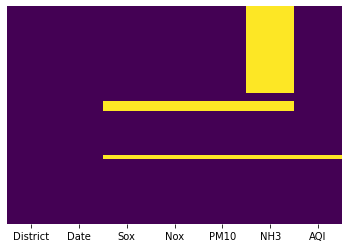

In [ ]:
# Check for null values

sb.heatmap(df4.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df4 =df4.dropna()

<AxesSubplot:>

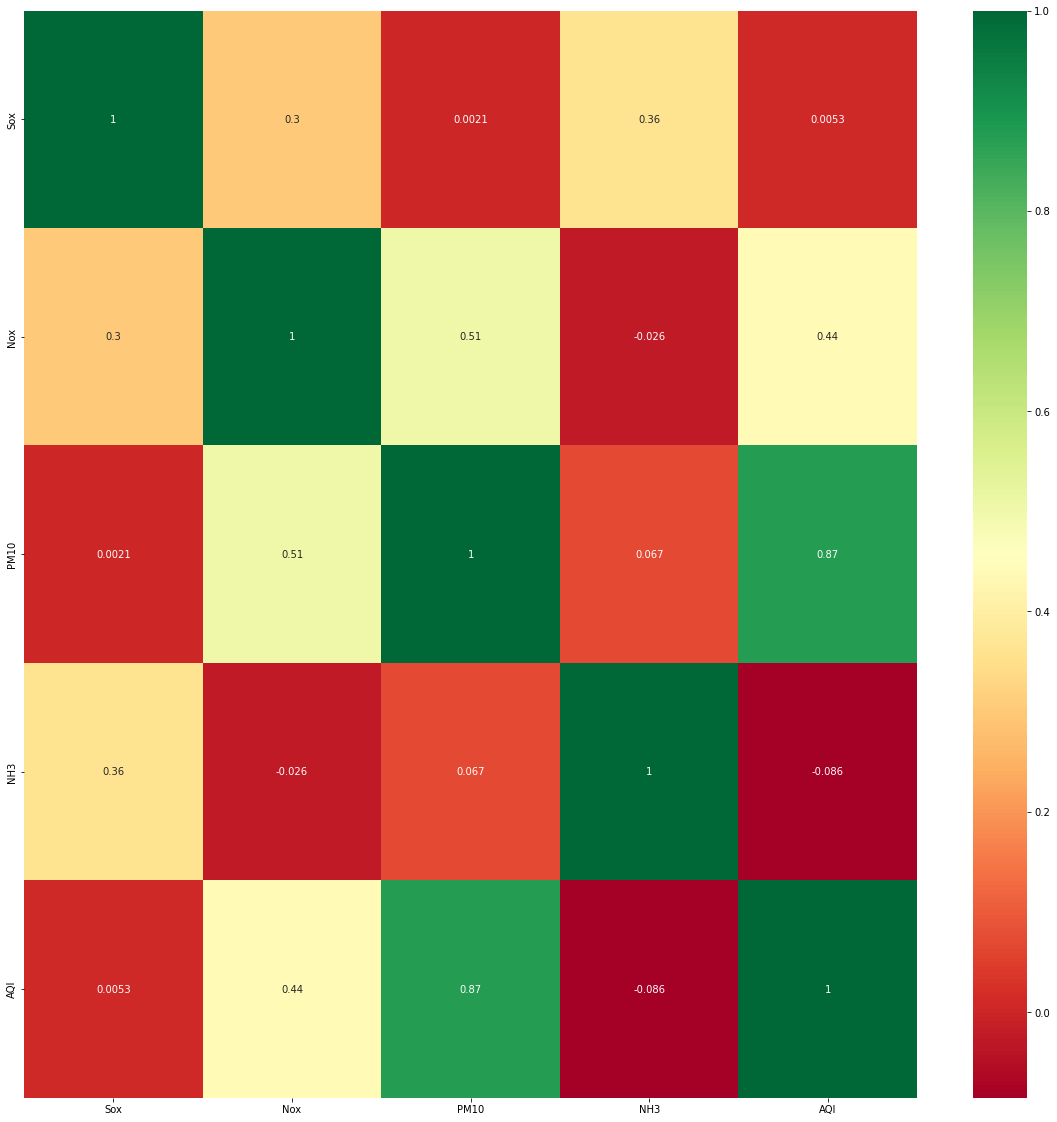

In [ ]:
#get correlations of each features in dataset
corrmat = df4.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sb.heatmap(df4[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# Importing required libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Creating a separate column for month and year
df4['Month'] = pd.to_datetime(df4['Date'], format='%d-%b').dt.month
df4['Year'] = pd.to_datetime(df4['Date'], format='%d-%b').dt.year

# Separating the features and target variable
X = df4[['Sox', 'Nox', 'PM10', 'NH3', 'Month', 'Year']]
y = df4['AQI']

# Adjusting the PM10 feature to take into account correlation as it is highly correlated
X['PM10'] = X['PM10'] * 0.87

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=5)

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting the AQI for the test set
y_pred = model.predict(X_test)

# Evaluating the model using Mean Squared Error and R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

# Predicting the AQI for a new set of monthly data
new_data = pd.DataFrame({'Sox': [25.6], 'Nox': [37.8], 'PM10': [35.02], 'NH3': [17.2], 'Month': [2], 'Year': [2022]})
predicted_aqi = model.predict(new_data)

print('Predicted  for next month:', predicted_aqi)


Mean Squared Error: 28.34126984126984
R2 Score: 0.7448139981216056
Predicted  for next month: [43.]


<ipython-input-80-4e89786f1d12>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PM10'] = X['PM10'] * 0.87
